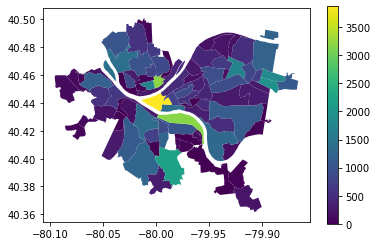

In [24]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

crimeData = pd.read_csv("Crime-Data.csv")
neighborhoodBounds = gpd.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/pittsburghpaneighborhoods-.zip")
neighborhoodBounds["crimes"] = 0

# Map the neighborhood names from the crimes dataset to the geo dataset
crimeNeighborhoods = pd.DataFrame()

crimeNeighborhoods["lon"] = crimeData.groupby("INCIDENTNEIGHBORHOOD")["X"].mean()
crimeNeighborhoods["lat"] = crimeData.groupby("INCIDENTNEIGHBORHOOD")["Y"].mean()
crimeNeighborhoods["new"] = None

for i, cN in crimeNeighborhoods.iterrows():
    for j, neighborhood in neighborhoodBounds.iterrows():
        if neighborhood["geometry"].contains(Point(cN["lon"], cN["lat"])):
            crimeNeighborhoods.loc[i, "new"] = neighborhood["hood"]
            break

countsByNeighborhood = crimeData["INCIDENTNEIGHBORHOOD"].value_counts()
for oldName, crimes in countsByNeighborhood.iteritems():
    newName = crimeNeighborhoods.loc[oldName, "new"]
    neighborhoodBounds.loc[neighborhoodBounds["hood"] == newName, "crimes"] += crimes

neighborhoodBounds.plot(column="crimes", legend=True)



In [29]:
neighborhoodBounds.loc[neighborhoodBounds["crimes"] > 0].sort_values("crimes").loc[:, ["hood", "crimes"]].head(20)

,hood,crimes
38,Central Northside,23
64,Ridgemont,35
37,New Homestead,39
50,Chartiers City,40
82,Swisshelm Park,40
28,East Carnegie,48
73,St. Clair,48
76,Summer Hill,67
7,Oakwood,79
23,Fairywood,112


In [30]:
# Scores the neighborhoods

neighborhoodBounds["score"] = 1 - neighborhoodBounds["crimes"] / neighborhoodBounds["crimes"].max()

neighborhoodBounds.loc[neighborhoodBounds["crimes"] > 0].sort_values("crimes").loc[:, ["hood", "score"]].head(20)

,hood,score
38,Central Northside,0.994061
64,Ridgemont,0.990963
37,New Homestead,0.989930
50,Chartiers City,0.989672
82,Swisshelm Park,0.989672
28,East Carnegie,0.987607
73,St. Clair,0.987607
76,Summer Hill,0.982701
7,Oakwood,0.979602
23,Fairywood,0.971082
